In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.models as models
from torch.utils.data import DataLoader

import random
import os
import copy

import torch

import sys
sys.path.append("../../")

from src.model.TransferModel import run_style_transfer
from src.dataset.dataset import ImgDataset
from src.utils.other import *

# grid of annie, kennen, mf

In [2]:
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
imsize = 512 if torch.cuda.is_available() else 128  # use small size if no gpu

style_dataset = ImgDataset("../../data/traditional_style_images/", imsize, device)
style_loader = DataLoader(style_dataset, batch_size=1, shuffle=False)

outfolder = "../../results/evolution/traditional_style_images_256/"
os.system("mkdir -p " + str(outfolder))

# the rest of this cell from:
# https://pytorch.org/tutorials/advanced/neural_style_tutorial.html
cnn = models.vgg19(pretrained=True).features.to(device).eval()
cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)
# desired depth layers to compute style/content losses :
content_layers_default = ['conv_4']
style_layers_default = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']

0

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 129.811386 Content Loss: 12.800230

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 1641.056396 Content Loss: 30.094206

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 132.862442 Content Loss: 19.042767

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 129.811386 Content Loss: 12.800230

run [100]:
Style Loss : 34.430817 Content Loss: 14.365285

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 1641.056396 Content Loss: 30.094206

run [100]:
Style Loss : 166.965622 Content Loss: 31.499680

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 132.862442 Content Loss: 19.042767

run [100]:
Style Loss : 44.277077 Content Loss: 18.662626

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 129.811386 Content Loss: 12.800230

run [100]:
Style Loss : 34.430817 Content Loss: 14.365285

run [

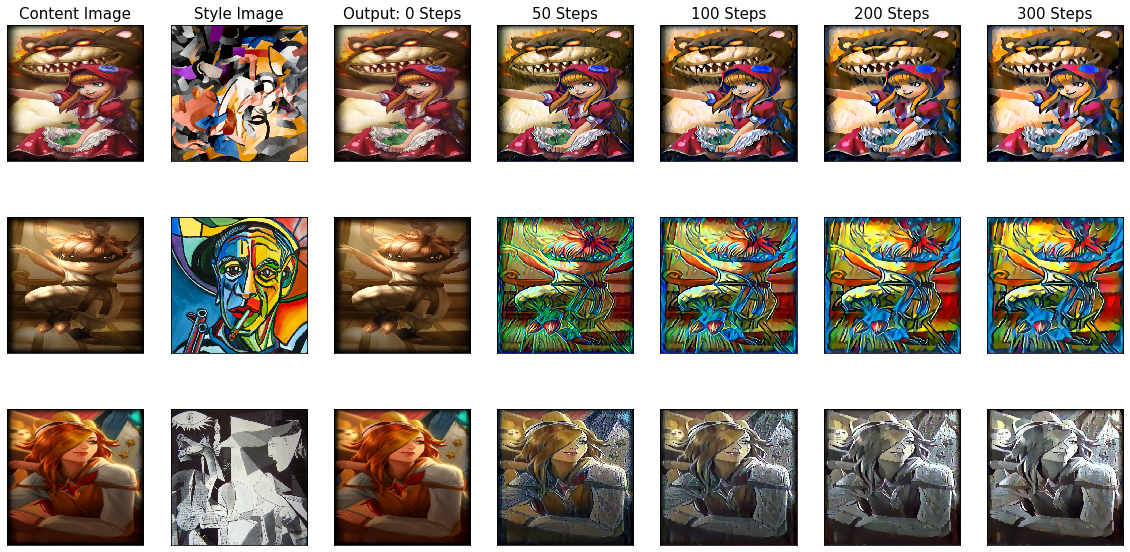

In [10]:
all_steps=[50, 100, 200, 300]
style_weight=1000000
content_weight=1
fontsize= 15

fig, axes = plt.subplots(3, len(all_steps) + 3, figsize=(20, 10))
for i in range(3):
    for j in range(len(all_steps) + 3):
        axes[i][j].get_xaxis().set_visible(False)
        axes[i][j].get_yaxis().set_visible(False)

# get annie data
annie_content = style_dataset.load_image("../../data/Annie_2-2.jpg", device)
for i, annie_style in enumerate(style_loader):
    if i == 5:
        break      
annie_style = annie_style.squeeze(0)

# get kennen data
kennen_content = style_dataset.load_image("../../data/Kennen_3.jpg", device)
for i, kennen_style in enumerate(style_loader):
    if i == 6:
        break
kennen_style = kennen_style.squeeze(0)

# get mf data
mf_path = "../../data/missfortuneloadscreen_17.skins_missfortune_skin15_chromas-300x545.jpg"
mf_content = style_dataset.load_image(mf_path, device)
for i, mf_style in enumerate(style_loader):
    pass
mf_style = mf_style.squeeze(0)


# show content, style, and 0 initial
imshow(annie_content, axes[0][0], "Content Image", fontsize)
imshow(annie_style, axes[0][1], "Style Image", fontsize)
imshow(annie_content, axes[0][2], "Output: 0 Steps", fontsize)

imshow(kennen_content, axes[1][0])
imshow(kennen_style, axes[1][1])
imshow(kennen_content, axes[1][2])

imshow(mf_content, axes[2][0])
imshow(mf_style, axes[2][1])
imshow(mf_content, axes[2][2])

count = 3
for steps in all_steps:
    # annie
    annie_output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                                      annie_content, annie_style, annie_content.clone(), num_steps=steps,
                                      style_weight=style_weight, content_weight=content_weight,
                                      do_print=True, device=device)
    imshow(annie_output, axes[0][count], str(steps) + " Steps", fontsize)
    
    # kennen
    kennen_output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                                       kennen_content, kennen_style, kennen_content.clone(), num_steps=steps,
                                       style_weight=style_weight, content_weight=content_weight,
                                       do_print=True, device=device)
    imshow(kennen_output, axes[1][count])
    
    # mf
    mf_output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                                   mf_content, mf_style, mf_content.clone(), num_steps=steps,
                                   style_weight=style_weight, content_weight=content_weight,
                                   do_print=True, device=device)
    imshow(mf_output, axes[2][count])
    count += 1
plt.savefig(outfolder + "annie_kennen_mf_steps_grid")
plt.show()    